In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print('HABILITANDO GPU - DONE')

Found GPU at: /device:GPU:0
HABILITANDO GPU - DONE


In [ ]:
!nvidia-smi

Wed Oct  7 01:38:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    27W /  70W |    227MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

print('DONE')

Mounted at /content/drive
DONE


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Feature Scaling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_svmlight_file
import time

print('DONE')

DONE


In [ ]:
def get_time():
    return time.time()


def get_time_diff(start_time):
    end_time = time.time()
    return round_float(end_time - start_time)


def round_float(value):
    return float("{:.3f}".format(value))


def get_num_rows(file):
    return sum(1 for line in open(file))


def generate_hash():
    return f"{get_time():.0f}"


def selecao_feature(X, y):
    print('SHAPE ENTRADA')
    print (X.shape)
    clf = ExtraTreesClassifier(n_estimators=100)
    clf = clf.fit(X,y)
    print("\n FEATURE IMPORTANCE")
    print(clf.feature_importances_)
    model = SelectFromModel(clf,prefit=True)
    X_new = model.transform(X)
    print('\nNEW SHAPE')
    print(X_new.shape)
    return X_new


def print_resultados(classifier, y_test, y_pred, diff_time, X_test):
    print('\n:::RESULTS:::')
    print("\nMatriz de Confusão: \n", confusion_matrix(y_test,y_pred))
    print("\nClassification Report: \n", classification_report(y_test,y_pred))
    print(f'\nTempo de Execução: {diff_time} s.')
    #print("\nAcurácia: ", accuracy_score(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAcurácia: : %.2f%%" % (accuracy * 100.0))
    print("\nImportância das Características: \n", classifier.feature_importances_)
    #######################################
    # Verificar se está certo Curva ROC #
    plot_roc_curve(classifier, X_test, y_test) 
    plt.show()
    ##########################################

In [ ]:
FILE_PATH_DRIVE = '/content/drive/My Drive/Colab Notebooks/'

print("Starting Loading Files\n")
x_train, y_train = load_svmlight_file(FILE_PATH_DRIVE + "data/train/credit_normalized.svmlight")
x_test, y_test = load_svmlight_file(FILE_PATH_DRIVE + "data/test/credit_normalized.svmlight")
x_train = x_train.toarray()
x_test = x_test.toarray()

print('DONE')

Starting Loading Files

DONE


**Selecao Atributos**

In [ ]:
X_new = selecao_feature(x_train, y_train)

print('DONE')

DONE


**XGBoost**


Training Shape : (76994, 706)
Testing  Shape : (32998, 706)

MODELO
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='reg:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

:::RESULTS:::

Matriz de Confusão: 
 [[  812  5996]
 [  445 25745]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.65      0.12      0.20      6808
         1.0       0.81      0.98      0.89     26190

    accuracy                           0.80     32998
   macro avg       0.73      0.55      0.55     32998
weighted avg       0.78      0.80      0.75     32998


Tempo de Execução: 0.35 s.

Acurácia: : 

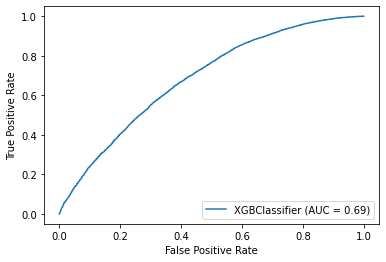

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# split data into train and test sets
seed = 100
test_size = 0.3

# separação treino - teste: 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X_new, y_train, test_size=test_size, random_state=seed)

#shapes
print('\nTraining Shape :',X_train.shape)
print('Testing  Shape :',X_test.shape)

# fit model no training data
## parametros do Modelo: https://xgboost.readthedocs.io/en/latest/python/python_api.html
model = XGBClassifier(random_state=1,learning_rate=0.01,max_depth=6, objective ='reg:logistic')
model.fit(X_train, y_train)

#modelo
print("\nMODELO")
print(model)

# make predictions for test data
start_time = get_time() # Tempo inicial
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
diff_time = get_time_diff(start_time) # Tempo final

print_resultados(model, y_test, predictions, diff_time, X_test)